Nama Anggota Kelompok :
- Luqman Hakim (PYTN - KS06 - 003)
- Fellysia Devi Pramono (PYTN - KS06 - 006)
<br>
---
<br>

# Project Introduction

**Project Overview**<br>
Database ini memiliki 13 atribut untuk Prediksi keselamatan pasien dari penyakit jantung.<br><br>
**Atribut Information**<br>
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# Import Library

In [1]:
!pip install mlxtend

In [1]:
## import library yang dibutuhkan

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import six
import sys

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot
from mlxtend.classifier import StackingCVClassifier
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from xgboost import XGBClassifier

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sys.modules['sklearn.externals.six'] = six

# Load Data

In [2]:
data = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv') ## Load dataset
data.head() ## Menampilkan 5 data teratas

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# EDA (Exploratory Data Analysis)

In [3]:
data = data.rename(columns={'DEATH_EVENT' : 'death'})

disini kita mengubah nama atribut 'DEATH_EVENT' menjadi 'death' agar lebih mudah dipahami

In [4]:
data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


<AxesSubplot:xlabel='death', ylabel='count'>

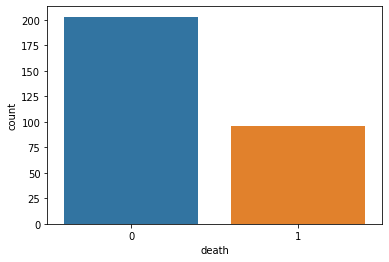

In [5]:
sb.countplot(data=data, x='death')

Dari plot diatas dapat disimpulkan bahwa feature target yang ada bersifat imbalanced atau tidak seimbang, sehingga perlu dilakukan resampling untuk membuat datanya seimbang.

In [6]:
data.shape

(299, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Total number of Died who was above 50: 85
Total number of Not Died who was above 50: 167


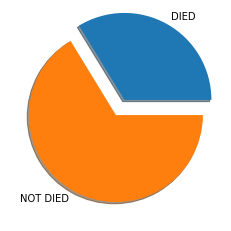

In [8]:
age_above_50_not_died = data['death'][data.age >=50][data.death == 0]
age_above_50_died = data['death'][data.age >= 50][data.death == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Total number of Died who was above 50: {len_died}')
print(f'Total number of Not Died who was above 50: {len_not_died}')

plt.pie(arr, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Dari diagram diatas dapat disimpulkan bahwa :
- total pasien diatas umur 50 meninggal adalah 85 orang
- total pasien diatas umur 50 yang selamat adalah 167 orang

In [9]:
categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 
               'sex', 'smoking']

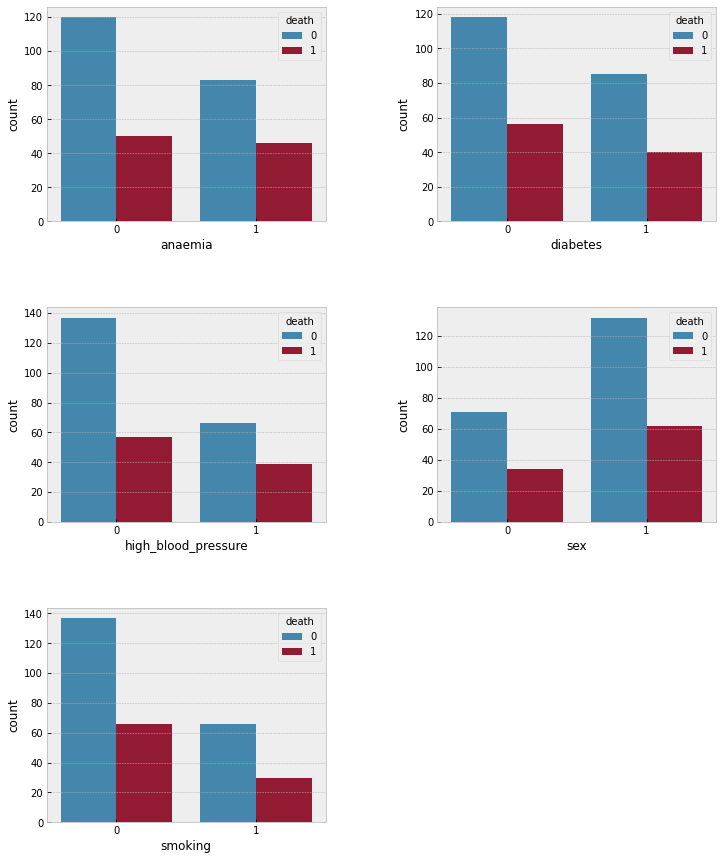

In [10]:
colors = sb.color_palette("tab10")
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 15))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, (col, name) in enumerate(zip(colors, categorical)):
        plt.subplot(3, 2, i+1)
        sb.countplot(data=data, x=name, hue='death')

Dari plot diatas, dapat disimpulkan bahwa :
- Pasien penyakit jantung yang tidak mengidap anemia lebih banyak yang meninggal yaitu sekitar 50 orang dibandingan dengan pasien yang mengidap anemia yaitu sekitar 46 orang.
- Pasien penyakit jantung yang tidak mengidap diabetes lebih banyak yang meninggal yaitu sekitar 55 orang dibandingan dengan pasien yang mengidap diabetes yaitu sekitar 40 orang.
- Pasien penyakit jantung yang tidak mengidap darah tinggi lebih banyak yang meninggal yaitu sekitar 55 orang dibandingan dengan pasien yang mengidap anemia yaitu sekitar 40 orang.
- Pasien penyakit jantung yang pria lebih banyak yang meninggal yaitu sekitar 64 orang dibandingan dengan pasien wanita yaitu sekitar 35 orang.
- Pasien penyakit jantung yang tidak merokok lebih banyak yang meninggal yaitu sekitar 65 orang dibandingan dengan pasien yang merokok anemia yaitu sekitar 30 orang.

# Data Cleansing

In [11]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death                       0
dtype: int64

Dapat dilihat bahwa data ini tidak memiliki missing value satupun.

<AxesSubplot:>

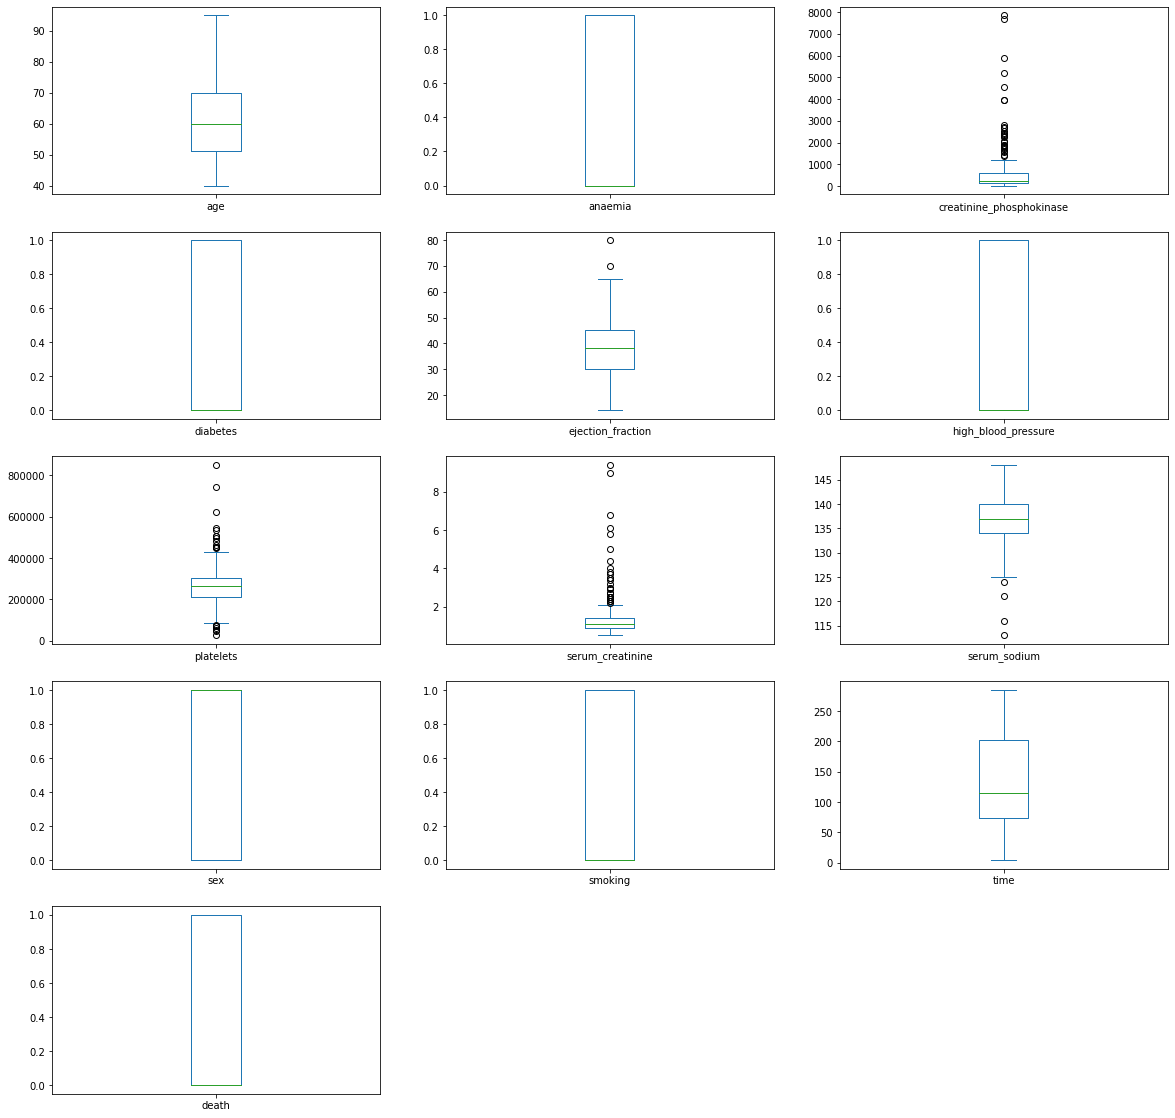

In [12]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)
ax3 = fig.add_subplot(5,3,4)
ax4 = fig.add_subplot(5,3,5)
ax5 = fig.add_subplot(5,3,6)
ax6 = fig.add_subplot(5,3,7)
ax7 = fig.add_subplot(5,3,8)
ax8 = fig.add_subplot(5,3,9)
ax9 = fig.add_subplot(5,3,10)
ax10 = fig.add_subplot(5,3,11)
ax11 = fig.add_subplot(5,3,12)
ax12 = fig.add_subplot(5,3,13)

data.age.plot(kind="box", ax=ax0)
data.anaemia.plot(kind="box", ax=ax1)
data.creatinine_phosphokinase.plot(kind="box", ax=ax2)
data.diabetes.plot(kind="box", ax=ax3)
data.ejection_fraction.plot(kind="box", ax=ax4)
data.high_blood_pressure.plot(kind="box", ax=ax5)
data.platelets.plot(kind="box", ax=ax6)
data.serum_creatinine.plot(kind="box", ax=ax7)
data.serum_sodium.plot(kind="box", ax=ax8)
data.sex.plot(kind="box", ax=ax9)
data.smoking.plot(kind="box", ax=ax10)
data.time.plot(kind="box", ax=ax11)
data.death.plot(kind="box", ax=ax12)

Dapat dilihat pada Boxplot diatas bahwa beberapa atribut seperti 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', dan 'serum_sodium' masih memiliki outlier, namun dikarenakan data terlalu sedikit, maka tidak perlu dilakukan impute outlier karena terlalu banyaknya modifikasi pada yang sedikit akan mempengaruhi performa data menjadi overfitting.

# Feature Importance

Feature Importance disini digunakan untuk menemukan feature terbaik untuk model


In [13]:
data_feature = data.copy()

time                        0.503744
serum_creatinine            0.101065
creatinine_phosphokinase    0.088375
platelets                   0.086397
ejection_fraction           0.069994
age                         0.046655
serum_sodium                0.038180
anaemia                     0.033425
high_blood_pressure         0.019380
diabetes                    0.012786
sex                         0.000000
smoking                     0.000000
dtype: float64


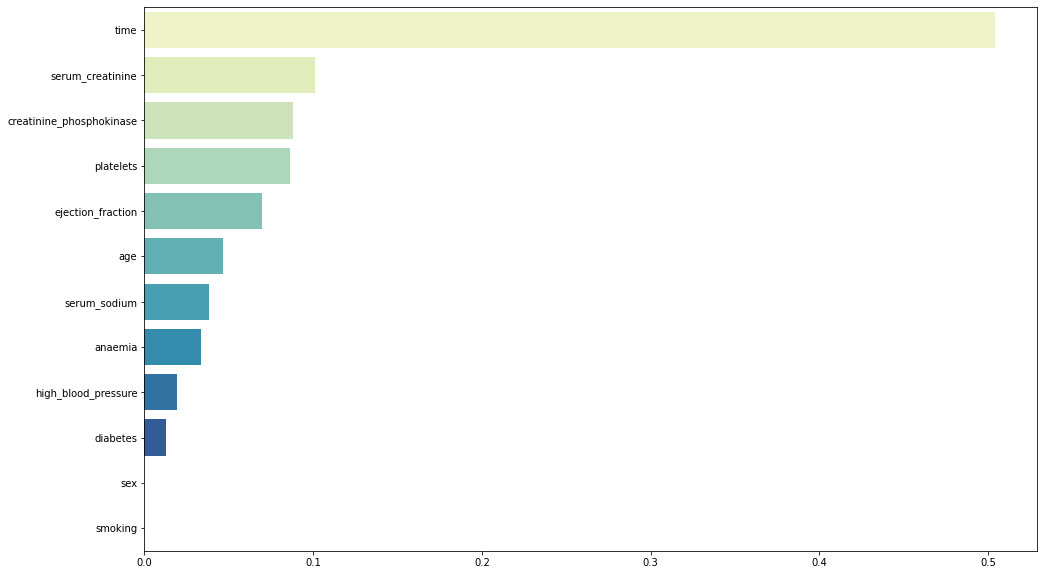

In [14]:
model = DecisionTreeClassifier()

x = data_feature.drop(columns='death', axis=1)
y = data.death
kolom = x.columns

model_importance = model.fit(x, y)

importance = pd.Series(model_importance.feature_importances_, index=kolom).sort_values(ascending=False)
print(importance)

plt.figure(figsize = (16,10))
sb.barplot(x=importance, y=importance.index, palette='YlGnBu')
plt.show()

Dari proses feature importance yang menggunakan Decision Tree diatas, didapati bahwa ada 5 feature terbaik yang dapat digunakan, yaitu 'time', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets', dan 'ejection_fraction'.

In [15]:
df = data.copy()

df = df[['time', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets', 'ejection_fraction', 'death']]

df.head(3)

,time,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,death
0,4,1.9,582,265000.00,20,1
1,6,1.1,7861,263358.03,38,1
2,7,1.3,146,162000.00,20,1


<AxesSubplot:>

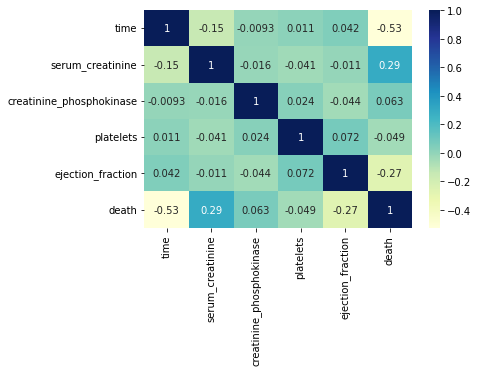

In [16]:
sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)

Dari heatmap diatas disimpulkan bahwa tidak ada multikolinearitas pada feature atau atribut yang akan digunakan untuk model.

# Resampling

In [17]:
x = df.drop('death', axis=1)
y = df['death']

In [18]:
x_over = x
y_over = y

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_over, y_over)

print(Counter(y_ros))

Counter({1: 203, 0: 203})


Dilakukan Resampling karena feature target tidak seimbang, sehingga perlu dilakukan resampling.

# Ensemble Learning

## Split data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state = 0)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Voting Classifier
Voting Classifier adalah model machine learning yang melatih ensemble atau gabungan dari banyak model dan memprediksi output (kelas) berdasarkan probabilitas tertinggi dari kelas yang dipilih sebagai output.
Simplenya model ini mengumpulkan temuan dari setiap pengklasifikasi yang diteruskan ke Voting Classifier dan memprediksi kelas keluaran berdasarkan mayoritas suara terbanyak. Idenya adalah daripada membuat model khusus yang terpisah dan menemukan akurasi untuk masing-masing model, kita membuat model tunggal yang dilatih oleh model ini dan memprediksi keluaran berdasarkan mayoritas suara gabungan untuk setiap kelas keluaran.
Voting Classifier dibagi menjadi 2:
1. Hard Voting : pada voting jenis ini, memprediksi kelas output dengan major vote tertinggi atau kelas yang mana memiliki probabilitas tertinggi untuk terprediksi pada suatu kelas. Contohnya ketika classifier memprediksi bahwa kelas output nantinya adalah (A, B, A), maka mayoritas yang diprediksi akan mengerluarkan A sebagai output
2. Soft Voting : pada voting jenis ini, memprediksi kelas output dengan based on average probability yang diberikan untuk kelas tersebut. Contohnya ketika kita memberi input pada 3 model, yaitu predictioni probability untuk kelas A=(0.30, 0.47, 0.53) dan kelas B=(0.20, 0.32, 0.40), maka average untuk kelas A adalah 0.4333 dan kelas B adalah 0.3067, maka pemenang yang akan tampil sebagai output adalah kelas A karena memiliki probability average tiap classifier tertinggi. 



<img title="Voting Classifier" alt="Alt text" src="https://files.codingninjas.in/article_images/the-voting-classifier-0-1639979194.jpg">


sumber :
- https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/
- https://www.codingninjas.com/codestudio/library/the-voting-classifier

### Cek akurasi base model

In [20]:
## define dictionary base model
def get_models():
    models = dict()
    models['svm'] = SVC()
    models['logreg'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['nb'] = GaussianNB()
    models['dt'] = DecisionTreeClassifier()
    return models

## function untuk evaluate model
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


svm model : 
average score = 0.53, average error = 0.06

logreg model : 
average score = 0.76, average error = 0.06

knn model : 
average score = 0.6, average error = 0.06

nb model : 
average score = 0.78, average error = 0.05

dt model : 
average score = 0.86, average error = 0.05


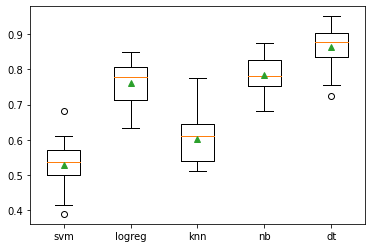

In [21]:
## jalankan function get_models()
## untuk mendapatkan dictionary base model
models = get_models()

## mengevaluasi base model dan melakukan storing results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_ros, y_ros)
    results.append(scores)
    names.append(name)
    print(f'\n{name} model : \naverage score = {np.round(np.mean(scores), 2)}, average error = {np.round(np.std(scores), 2)}')

## membuat plot untuk membandingkan tiap model
plt.figure(figsize=(6, 4))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

### Mengunakan GridSearchCV
GridSearchCV disini digunakan untuk melakukan hyperparameter tuning agar nantinya bisa mendapatkan parameter terbaik untuk base model dengan cara mencari parameter terbaik dari dictionary parameter yang sudah kita buat untuk model.

In [22]:
param_dtree = {'max_depth' : [5, 10, 20, 30, 50, 100, 500, 1000],
               'max_features' : [5, 10, 20, 30, 50, 100, 500, 1000]
              }

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(dt, param_dtree)
grid_model_dt = grid_dt.fit(x_ros, y_ros)
print(f'The best parameter for Decision Tree is = \n {grid_model_dt.best_params_}')

The best parameter for Decision Tree is = 
 {'max_depth': 5, 'max_features': 20}


In [23]:
param_nb = {'var_smoothing': np.logspace(0,-9, num=100)
           }
nb = GaussianNB()

grid_nb = GridSearchCV(nb, param_nb)
grid_model_nb = grid_nb.fit(x_ros, y_ros)
print(f'The best parameter for Naive Bayes is = \n {grid_model_nb.best_params_}')

The best parameter for Naive Bayes is = 
 {'var_smoothing': 1.2328467394420635e-09}


In [24]:
param_logreg = {'penalty' : ['l1', 'l2'],
                'C': [0.001,0.01,0.1,1,10,100,1000]
               }
logreg = LogisticRegression()

grid_logreg = GridSearchCV(logreg, param_logreg)
grid_model_logreg = grid_logreg.fit(x_ros, y_ros)
print(f'The best parameter for Logistic Regression is = \n {grid_model_logreg.best_params_}')

The best parameter for Logistic Regression is = 
 {'C': 0.001, 'penalty': 'l2'}


Karena dari evaluasi base model sebelumnya didapatkan bahwa model Logistic Regression, Naive Bayes, dan Decision Tree merupakan model dengan tingkat akurasi yang tinggi, maka untuk hard voting nantinya akan digunakan 3 model yaitu Logistic Regression, Naive Bayes, dan juga Decision Tree.

### Menggunakan Voting Classifier

Disini voting classifier digunakan untuk mendapatkan model machine learning yang lebih stabil

Disini voting classifier mulai di definisikan dengan base estimator nya Logistic Regression, Naive Bayes, dan Decision Tree

In [29]:
## define voting classifier dengan estimator 
ensemble = VotingClassifier(estimators=[('logreg', LogisticRegression(**grid_logreg.best_params_)),
                                        ('nb', GaussianNB(**grid_nb.best_params_)),
                                        ('dt', DecisionTreeClassifier(**grid_dt.best_params_))],
                            voting='soft')

## define dictionary base model ditambah dengan voting classifier
def get_models():
    models = dict()
    models['svm'] = SVC()
    models['logreg'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['nb'] = GaussianNB()
    models['dt'] = DecisionTreeClassifier()
    models['soft_voting'] = ensemble
    return models

## function untuk evaluate model
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


svm model : 
average score = 0.53, average error = 0.06

logreg model : 
average score = 0.76, average error = 0.06

knn model : 
average score = 0.6, average error = 0.06

nb model : 
average score = 0.78, average error = 0.05

dt model : 
average score = 0.87, average error = 0.06

soft_voting model : 
average score = 0.81, average error = 0.04


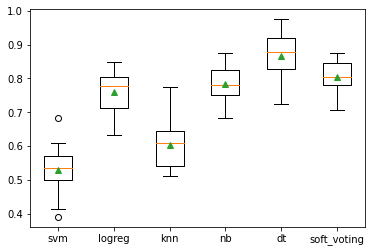

In [30]:
## jalankan function get_models()
## untuk mendapatkan dictionary base model dan ensemble voting classifier
models = get_models()

## mengevaluasi base model dan ensemble voting classifier lalu melakukan storing results score nya
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_ros, y_ros)
    results.append(scores)
    names.append(name)
    print(f'\n{name} model : \naverage score = {np.round(np.mean(scores), 2)}, average error = {np.round(np.std(scores), 2)}')

## membuat plot untuk membandingkan tiap model
plt.figure(figsize=(6, 4))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [36]:
soft_voting = ensemble.fit(x_train, y_train)

Dari Boxplot dan evaluasi terhadap base model yang ada, dapat disimpulkan bahwa voting mendapatkan akurasi yang paling tinggi di angka 81% dan average error 4%, selain itu model ensemble voting ini juga lebih stabil stabil.

## StackingCVClassifier

Stacking adalah teknik machine learning ensemble untuk menggabungkan beberapa model klasifikasi melalui meta-classifier. Model klasifikasi individu dilatih berdasarkan set pelatihan yang lengkap, kemudian meta-classifier dipasang berdasarkan output meta-features dari model klasifikasi individual dalam metode ensemble. Meta-classifier dapat dilatih pada label kelas yang diprediksi atau probabilitas dari metode ensembel.

<img title="a title" alt="Alt text" src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png">

sumber : 
- https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [32]:
etc = ExtraTreesClassifier()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()

### Evaluate model

In [34]:
scv=StackingCVClassifier(classifiers=[etc, logreg, knn, nb, dt],
                         meta_classifier= svm)


model_stack = scv.fit(np.asarray(x_train),np.asarray(y_train))
y_pred = model_stack.predict(x_test)
stack_cm = confusion_matrix(y_test, y_pred)
stack_accuracy = accuracy_score(y_test, y_pred)
stack_precision = precision_score(y_test, y_pred)
stack_recall = recall_score(y_test, y_pred)
stack_f1 = f1_score(y_test, y_pred)

print('confussion matrix')
print(stack_cm)
print(f'\nAccuracy score of StackingCVClassifier : {np.round(stack_accuracy*100, 2)}\n')
print(f'Precision score of StackingCVClassifier : {np.round(stack_precision*100, 2)}\n')
print(f'Recall score of StackingCVClassifier : {np.round(stack_recall*100, 2)}\n')
print(f'F1 score of StackingCVClassifier : {np.round(stack_f1*100, 2)}\n')
print(classification_report(y_test, y_pred))

confussion matrix
[[48  5]
 [ 8 61]]

Accuracy score of StackingCVClassifier : 89.34

Precision score of StackingCVClassifier : 92.42

Recall score of StackingCVClassifier : 88.41

F1 score of StackingCVClassifier : 90.37

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.92      0.88      0.90        69

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.90      0.89      0.89       122



Dari model evaluasi diatas kita mendapatkan akurasi yang sangat tinggi menggunakan model ensemble stacking classifier dengan tingkat akurasi sekitar 90%, 

# Model Inference

In [35]:
df.tail(2)

,time,serum_creatinine,creatinine_phosphokinase,platelets,ejection_fraction,death
297,280,1.4,2413,140000.0,38,0
298,285,1.6,196,395000.0,45,0


## Voting Classifier

In [37]:
joblib.dump(soft_voting, 'voting.pkl')

['voting.pkl']

In [38]:
stacking = joblib.load('voting.pkl')

time = int(input('Waktu untuk follow-up (hari) : '))
serum_creatinine = float(input('level serum creatinine di darah (mg/dL) : '))
creatinine_phosphokinase = int(input('Level enzim CPK (mcg/L) : '))
platelets = float(input('Jumlah platelet di darah (kiloplatelets/mL) : '))
ejection_fraction = int(input('Darah yang meninggalkan jantung di setiap kontraksi jantung (%) : '))

val_input = [time, serum_creatinine, creatinine_phosphokinase, platelets, ejection_fraction]

pred = soft_voting.predict([val_input])

if pred == 0:
    print('Pasien memiliki kesempatan hidup tinggi')
elif pred == 1:
    print('Pasien memiliki kesempatan hidup rendah')
else:
    print('Prediksi tidak valid!')

Waktu untuk follow-up (hari) : 280
level serum creatinine di darah (mg/dL) : 1.4
Level enzim CPK (mcg/L) : 2413
Jumlah platelet di darah (kiloplatelets/mL) : 140000.0
Darah yang meninggalkan jantung di setiap kontraksi jantung (%) : 38
Pasien memiliki kesempatan hidup tinggi


## Stacking Classifier

In [39]:
joblib.dump(model_stack, 'stacking.pkl')

['stacking.pkl']

In [40]:
stacking = joblib.load('stacking.pkl')

time = int(input('Waktu untuk follow-up (hari) : '))
serum_creatinine = float(input('level serum creatinine di darah (mg/dL) : '))
creatinine_phosphokinase = int(input('Level enzim CPK (mcg/L) : '))
platelets = float(input('Jumlah platelet di darah (kiloplatelets/mL) : '))
ejection_fraction = int(input('Darah yang meninggalkan jantung di setiap kontraksi jantung (%) : '))

val_input = [time, serum_creatinine, creatinine_phosphokinase, platelets, ejection_fraction]

pred = model_stack.predict([val_input])

if pred == 0:
    print('Pasien memiliki kesempatan hidup tinggi')
elif pred == 1:
    print('Pasien memiliki kesempatan hidup rendah')
else:
    print('Prediksi tidak valid!')

Waktu untuk follow-up (hari) : 280
level serum creatinine di darah (mg/dL) : 1.4
Level enzim CPK (mcg/L) : 2413
Jumlah platelet di darah (kiloplatelets/mL) : 140000.0
Darah yang meninggalkan jantung di setiap kontraksi jantung (%) : 38
Pasien memiliki kesempatan hidup tinggi


# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa :

1. Project ini membahas tentang penerapan Ensemble Learning, yang mana disini kami menggunakan Tipe Ensemble Learning untuk various type, yaitu menggunakan Voting Classifier dan Stacking Classifier.
2. Data yang ada dalam project ini merupakan data yang bisa dibilang sudah clean dan hanya tinggal melakukan analisis dan penerapan model ensemble learning.
3. Feature yang paling mempengaruhi kolom target adalah feature 'time'.
4. Feature target yang ada pada data ini bersifat imbalanced atau tidak seimbang, sehingga saat melakukan penerapan model machine learning memerlukan proses resampling sehingga dapat diseimbangkan.
5. Merokok atau tidak, umur, jenis kelamin, dan riwayat penyakit seperti diabetes,  pasien tidak menentukan pasien tersebut berpeluang sakit jantung.
6. Dari diagram lingkaran yang sudah dibuat diatas dapat disimpulkan bahwa :
    - total pasien diatas umur 50 meninggal adalah 85 orang
    - total pasien diatas umur 50 yang selamat adalah 167 orang
7. Dari countplot yang sudah dibuat diatas, dapat disimpulkan bahwa :
    - Pasien penyakit jantung yang tidak mengidap anemia lebih banyak yang meninggal yaitu sekitar 50 orang dibandingan dengan pasien yang mengidap anemia yaitu sekitar 46 orang.
    - Pasien penyakit jantung yang tidak mengidap diabetes lebih banyak yang meninggal yaitu sekitar 55 orang dibandingan dengan pasien yang mengidap diabetes yaitu sekitar 40 orang.
    - Pasien penyakit jantung yang tidak mengidap darah tinggi lebih banyak yang meninggal yaitu sekitar 55 orang dibandingan dengan pasien yang mengidap anemia yaitu sekitar 40 orang.
    - Pasien penyakit jantung yang pria lebih banyak yang meninggal yaitu sekitar 64 orang dibandingan dengan pasien wanita yaitu sekitar 35 orang.
    - Pasien penyakit jantung yang tidak merokok lebih banyak yang meninggal yaitu sekitar 65 orang dibandingan dengan pasien yang merokok anemia yaitu sekitar 30 orang.
8. Karena data terlalu sedikit, maka tidak dapat melakukan terlalu banyak modifikasi terhadap data.
9. Pada Ensemble Learning ini kami menggunakan tipe ensemble learning untuk various type, yaitu :
    - Voting Classifier (soft voting) ditambah dengan GridSearchCV untuk melakukan hyperparameter tuning untuk mendapatkan parameter terbaik untuk base classifier, sehingga metode ini mendapatkan model yang stabil dengan akurasi sekitar 81% dan average error sekitar 4%.
    - Stacking Classifier, yang mana membutuhkan base classifier dan juga meta classifier, yang mana kami mendapat akurasi yang sangat tinggi yaitu sekitar 90%.